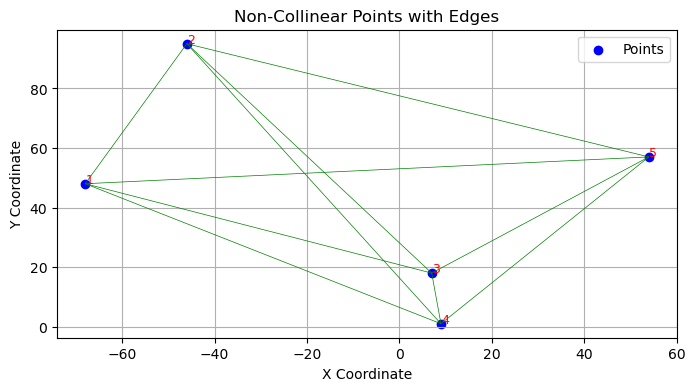

[4, 3, 1, 5, 2]
[4, 3, 5, 1, 2]
[4, 5, 3, 1, 2]
[5, 4, 3, 1, 2]
[5, 4, 3, 2, 1]
[5, 3, 4, 2, 1]
[5, 3, 2, 4, 1]
[5, 2, 3, 4, 1]
[5, 2, 3, 1, 4]
[5, 2, 1, 3, 4]
[2, 5, 1, 3, 4]
3.0


In [1]:
import random
import matplotlib.pyplot as plt
import math

NUM_POINT = 5  # Number of points to generate

def sort_points_by_x(points):
    """Sort points by x-coordinates."""
    return sorted(points, key=lambda l: l[0])

def generate_non_collinear_points(n, min_val=-100, max_val=100):
    """Generate a set of non-collinear points."""
    points = []
    while len(points) < n:
        x, y = random.randint(min_val, max_val), random.randint(min_val, max_val)
        temp_points = points + [(x, y)]
        if len(temp_points) < 3 or not are_more_than_three_collinear(temp_points):
            points.append((x, y))
    points = sort_points_by_x(points)
    return points

def are_more_than_three_collinear(points):
    """Check if more than three points are collinear."""
    n = len(points)
    for i in range(n):
        slopes = {}
        for j in range(n):
            if i != j:
                dx = points[j][0] - points[i][0]
                dy = points[j][1] - points[i][1]
                if dx == 0:
                    s = float('inf')  # Vertical slope
                else:
                    s = dy / dx
                slopes[s] = slopes.get(s, 0) + 1
        if any(count >= 2 for count in slopes.values()):
            return True
    return False

def find_slope(p, q):
    """Calculate the slope between two points."""
    if q[0] == p[0]: 
        return float('inf')
    return (q[1] - p[1]) / (q[0] - p[0])

def find_all_swaps(seq):
    """Find all possible pair swaps in a sequence."""
    swaps = []
    for i in range(len(seq)):
        for j in range(i + 1, len(seq)):
            swaps.append((seq[i], seq[j]))
    return swaps

def switch_elements(lst, u, v):
    a, b = lst.index(u), lst.index(v)
    lst[a], lst[b] = lst[b], lst[a]
    return lst

def perpendicular_line(x1, y1, x2, y2, length=300):
    """Calculate the endpoints of a perpendicular line."""
    dx = x2 - x1
    dy = y2 - y1

    perp_dx = -dy
    perp_dy = dx

    # Normalize the perpendicular vector
    magnitude = math.sqrt(perp_dx**2 + perp_dy**2)
    perp_dx /= magnitude
    perp_dy /= magnitude

    # Scale to half the desired length
    half_length = length / 2
    perp_dx *= half_length
    perp_dy *= half_length

    # Calculate the midpoint of the original line
    mid_x = (x1 + x2) / 2
    mid_y = (y1 + y2) / 2

    # Calculate the endpoints of the perpendicular line
    x3 = mid_x + perp_dx
    y3 = mid_y + perp_dy
    x4 = mid_x - perp_dx
    y4 = mid_y - perp_dy
    
    return (x3, y3), (x4, y4)

def project_to_line(points, line_start, line_end):
    x1, y1 = line_start
    x2, y2 = line_end

    # Direction vector of the line
    ab_x = x2 - x1
    ab_y = y2 - y1
    ab_magnitude_squared = ab_x**2 + ab_y**2

    projections = []

    for idx, (px, py) in enumerate(points):
        # Vector from line_start to the point
        ap_x = px - x1
        ap_y = py - y1

        # Calculate the projection scalar t
        t = (ap_x * ab_x + ap_y * ab_y) / ab_magnitude_squared

        # Store the original point's index and its t value
        projections.append((t, idx))

    # Sort by the scalar t (smallest to largest)
    projections.sort(key=lambda x: x[0], reverse=True)

    # Extract the sorted points
    sorted_points = [points[idx] for _, idx in projections]
    return sorted_points


def circular_sequence(points):
    cs = list(range(1, NUM_POINT + 1))
    swaps = find_all_swaps(cs)

    positive = []
    negative = []

    for s in swaps:
        u, v = s
        u_index = u - 1
        v_index = v - 1
        slope = find_slope(points[u_index], points[v_index])
        if slope < 0:
            negative.append((slope, (u, v))) 
        else:
            positive.append((slope, (u, v)))

    # Sort by slope in ascending order
    negative.sort(key=lambda x: x[0])
    positive.sort(key=lambda x: x[0])
    
    negative = [pair for _, pair in negative]
    positive = [pair for _, pair in positive]

    initial_cs = [points.index(i) + 1 for i in sorted(points, key=lambda p: (p[1], p[0]))]
    
    cs_final = []
    cs = initial_cs
    cs_final.append(cs.copy())
    swap_list = positive + negative

    for u, v in swap_list:
        cs = switch_elements(cs, u, v)
           
        if cs not in cs_final:
            cs_final.append(cs.copy())

    return cs_final
    
def crossing_number(cs):
    n = NUM_POINT
    cs_t = [[row[i] for row in cs] for i in range(len(cs[0]))]
    e_j = [0] * (len(cs[0]) - 1)
    for i in range(len(cs_t) - 1):
        for j in range(len(cs_t[i]) - 1):
            if((cs_t[i][j], cs_t[i + 1][j]) == (cs_t[i + 1][j + 1], cs_t[i][j + 1])):
                e_j[i] += 1
    cr = 0
    for j in range(len(e_j)):
        temp = e_j[j] * ((n-2)*(n-3)/4 - j*(n-j-2))
        cr += temp
    return cr


points = generate_non_collinear_points(NUM_POINT) 

x_coords, y_coords = zip(*points)  # Unzip the points into x and y coordinates
plt.figure(figsize=(8, 4))
plt.scatter(x_coords, y_coords, color='blue', label='Points')
for i, (x1, y1) in enumerate(points):
    for j, (x2, y2) in enumerate(points):
        if i < j:  # Ensure each edge is drawn only once
            plt.plot([x1, x2], [y1, y2], color='green', linestyle='-', linewidth=0.5)
for i, (x, y) in enumerate(points):
    plt.text(x + 0.1, y + 0.1, str(i + 1), fontsize=9, color='red')
plt.title("Non-Collinear Points with Edges")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.legend()
plt.show()

cs = circular_sequence(points)
for i in cs: print(i)
print(crossing_number(cs))
